In [1]:
from initialconditions import *
from Analytical import *
from plotters import *
from numerical import *
from rungekutta import *
from energy import *
from energyhalf import *

# MTMW14 2023 (Student number: 30837509)

# Project 2: A simplified model of ocean gyres and the Gulf Stream

# Introduction

This project explores the dynamics of an ocean gyre based on the model of Stommel (1948). Stommel modelled a wind-driven circulation in a closed ocean basin, resulting in a western boundary current. The fluid is considered incompressible, with a free surface and solid lower boundary. Hydrostatic balance applies in the vertical, and the linearised shallow water equations are used to model the gyre, with added forcing components of wind stress and linear drag.

# Task A

1. This model can support inertial gravity waves, and Kelvin waves. The gravity waves are the most relevant to the calculation of CFL since we need to consider the worst possible case i.e. the smallest timestep which can be found using the waves with the fastest propogation speed and gravity waves propogate at 100 m/s. These waves are not spawned by the intial conditions as they assume the fluid to be at rest with no surface elevation. However, the wind forcing causes the fluid to move and the inertial gravity waves form. As we perform integration to steady state, these waves dissipate as can be seen in Task D : Steady state plots. 

  The initial conditions assume the fluid to be at rest with no surface elevation. As the wind stress causes the fluid   to move during the period of integration, inertia-gravity waves will form. As the model moves towards the steady       state, the gravity-inertia waves will disipate.

2. Rossby radius of deformation $R_D = \frac{\sqrt{gH}}{f_0}$ where $g = 10 ms^{-2}$, $H=10^{3} m$, $f_0=10^{-4}       s^{-1}$

  $R_D = 10^6m$
  

3. According to Stommel (1948), the phenomenon which in this is the boundary current is of the size D = $10^5m$. Hence to fully resolve a feature on a mesh we need the resoluton to be $\frac{D}{4}$ = $\frac{10^5}{4}$ = 25000 m.  Thus the maximum allowed d is Δx = Δy = 25000 m.
As $d\ll R_D$, with $\frac{R_D}{d}=40$, we should use a fine grid model and Arakawa C grid as it gives the best performance in dispersion of both gravity-inertia and Rossby waves. 




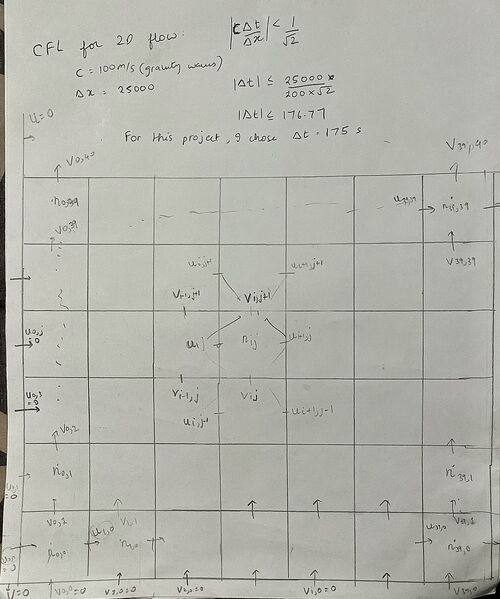

In [2]:
from PIL import Image
Image.open("ArakawaCgrid.jpg")

Figure 1. Arakawa C grid with surface elevation, zonal velocities and meriodional velocities. Boundary conditions are also drawn.

Since we chose the maximum wave speed of 100m/s and Δx = 25000, using 2D CFL criterion for which the flow travels the effective distance of 0.707 i.e. diagonally which allows us to avoid computational instability under any circumstances. Since the maximum limit for Δt was found above using CFL as 176.6, in this project I will be using   Δt = 175 s

# Task B

The boundary conditions are drawn above in the Arakawa C grid. The velocities u and v will be zero along all four boundaries. Thus there will be no normal flow to the boundaries and no slip conditions.

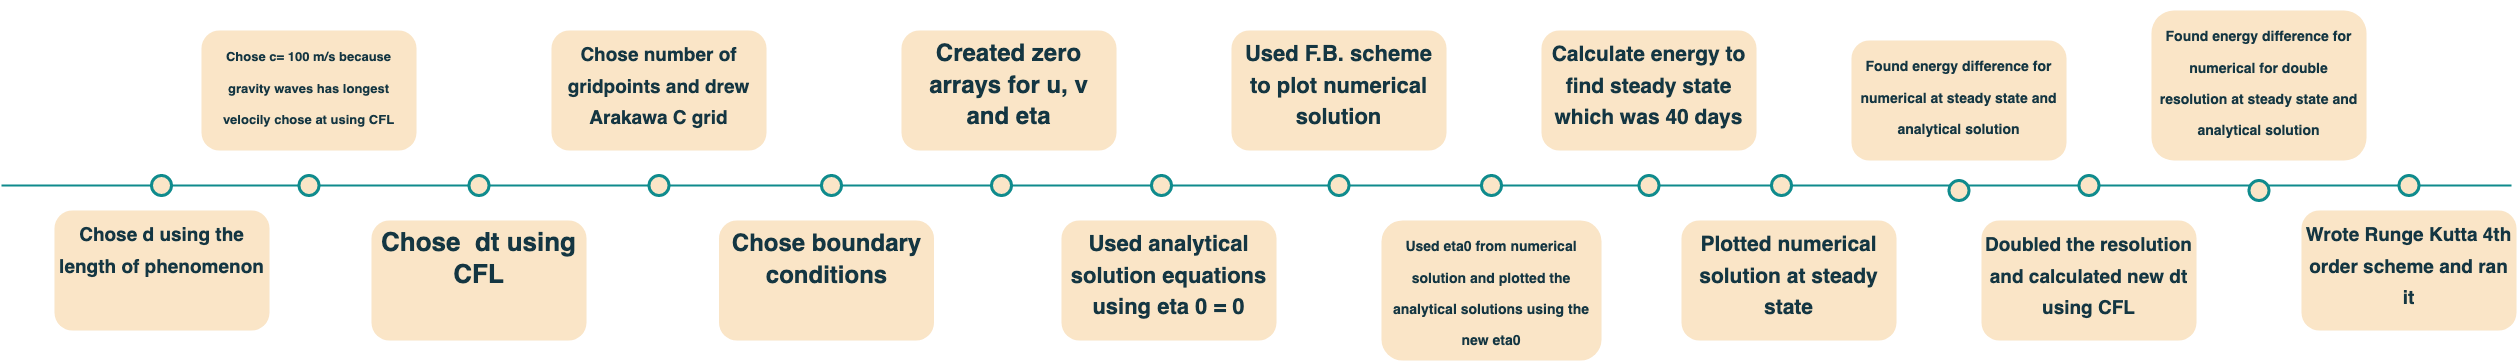

In [3]:
Image.open("flochart.png")

# Task C

Mushgrave (1985) derived an analytical solution of equations for steady state.

In [4]:
%%time
uana,vana,etaana = analytic(Xana,Yana,-0.10837922545232187)

CPU times: user 696 µs, sys: 617 µs, total: 1.31 ms
Wall time: 815 µs


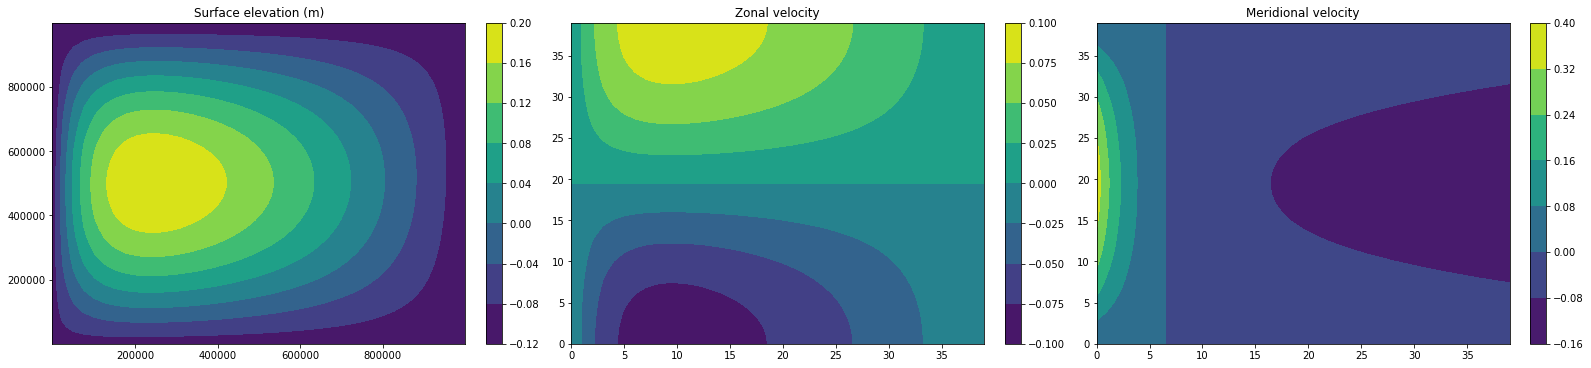

In [5]:
TaskC(etaana,uana,vana)

          Figure 2. Surface elevation, zonal velocity and meridional velocity across the closed ocean basin.

Value for 𝜂0 was first taken as zero but later substituted from the value found in Task D at steady state for 𝜂 at (0,𝐿/2). The steady state value of 𝜂 is used for the above plots. A positive rotation around the gyre with the surface elevation increasing in the centre.
  

# Task D

The forward-backward time scheme (Matsuno (1966); Beckers and Deleersnijder (1993))was used below. It was run for dt = 175 for a length of 1 day first.

In [6]:
%%time
uval,vval,etaval = numerical(d,u,v,η,u1,v1,η_1,xpoints,ypoints,X,Y,1,dt) #enter number of days here; Days = 1

CPU times: user 81.8 ms, sys: 815 µs, total: 82.7 ms
Wall time: 82.2 ms


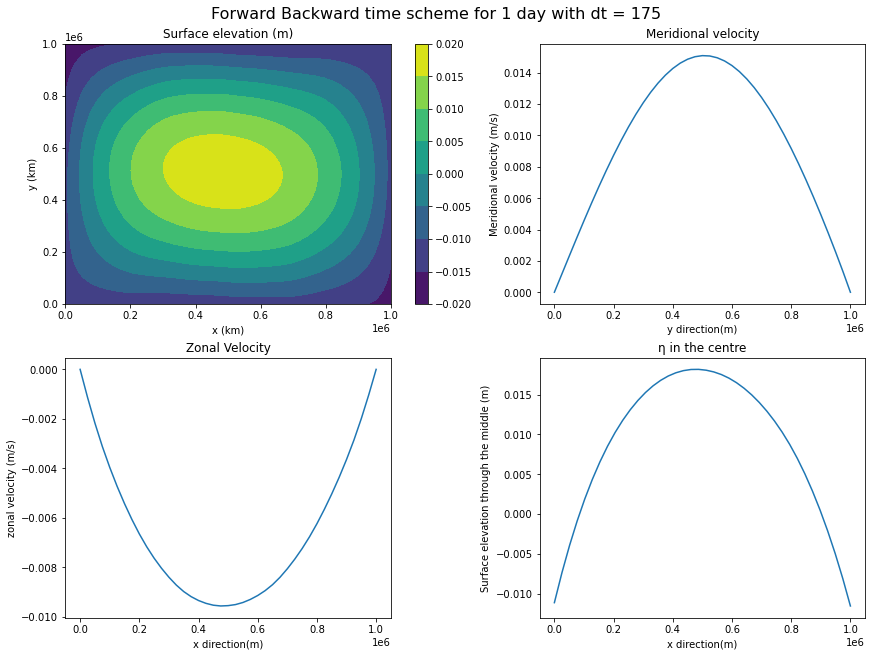

In [7]:
TaskD1plot(etaval,uval,vval)

# Task E

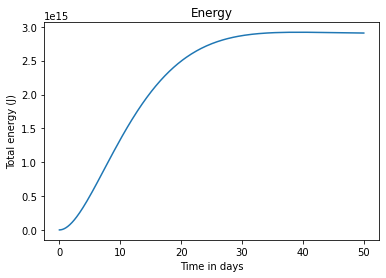

In [8]:
ue,ve,ηe,Energyval= numericalenergy(d,u,v,η,u1,v1,η_1,xpoints,ypoints,X,Y,Eintime)
energyplot(Energyval,50)

As we can see, steady state is reached around 40 days

# Task D : Steady State

Now running the F.B. scheme for steady state of 40 days

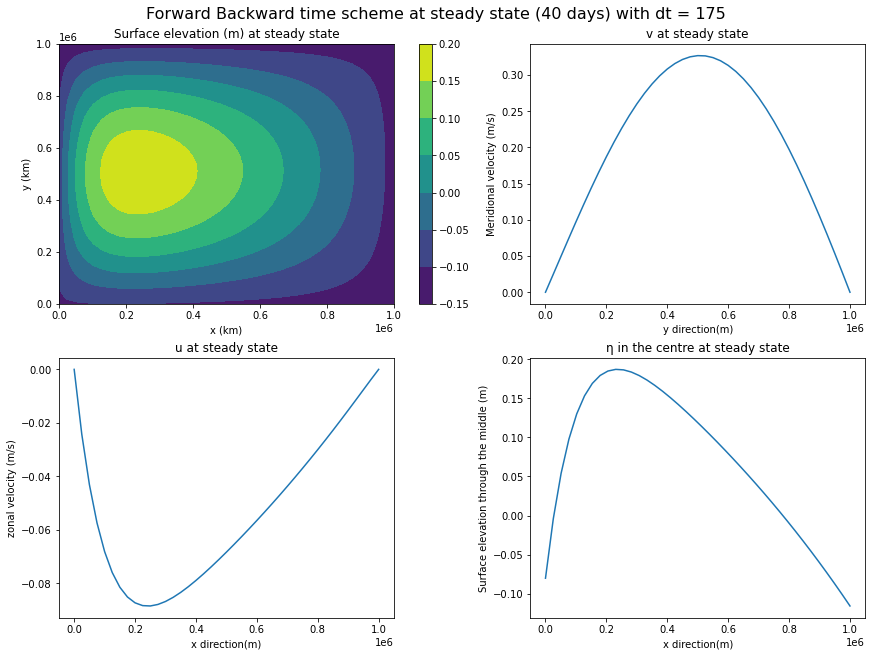

CPU times: user 3.54 s, sys: 11.6 ms, total: 3.55 s
Wall time: 3.56 s


In [9]:
%%time
uvalsteady,vvalsteady,etavalsteady = numerical(d,us,vs,ηs,us1,vs1,ηs_1,xpoints,\
                                       ypoints,X,Y,40,dt)
TaskD2plot(etavalsteady,uvalsteady,vvalsteady)

A western boundary current can be observed at steady state 

Finding 𝜂 at (0,𝐿/2) to substitute back into the analytical solution

In [10]:
eta0steady = etavalsteady[0,20]
print(eta0steady)

-0.10844951221440005


In [11]:
energydiff(etaana,uana,vana,etavalsteady,uvalsteady,vvalsteady)

Energy difference between analytical and numerical solution is 7.77e+14


Now when we half the grid-spacing i.e. d = 25000/2 = 12500, we also need to recalculate our time step to satisfy the 2D CFL criterion. New timestep Δt = 88. First we need to find the new values of numerical solution for these new conditions and then calculate the difference

We need to recalculate the energy since the steady state changes with the changes in grid spacing and timestep.

For the new values the system reaches steady state at 87 days

In [12]:
uvalsteadyhalf,vvalsteadyhalf,etavalsteadyhalf = numerical(d/2,uhalf,vhalf,ηhalf,uhalf1,vhalf1,ηhalf_1,xpoints,\
                                       ypoints,X,Y,87,50) # running it for 87 days

In [13]:
eta0steadyhalf = etavalsteadyhalf[0,20]
print(eta0steadyhalf)

-0.05387752420190289


As we are changing the resolution, the 𝜂0 value will change. Hence, we have to input a new 𝜂0 into our analytical solution.

In [14]:
uanahalf,vanahalf,etaanahalf = analytic(Xana,Yana,-0.05387752420190289)

In [15]:
energydiff(etaanahalf,uanahalf,vanahalf,etavalsteadyhalf,uvalsteadyhalf,vvalsteadyhalf)

Energy difference between analytical and numerical solution is 8.02e+14


The energy difference is increasing when the resolution is doubled

# Task G: Runge Kutta 4th order

A Runge Kutta fourth order scheme (RK4) was written to compare it with the Forward Backward (F.B.) scheme results. RK4 is fourth order accurate whereas F.B. scheme is first order accurate. But then RK4 runs 4 equations which means it should take longer. Let's find out by running it for 40 days so that we can compare it with F.B. results



In [16]:
%%time
ηvalrk,uvalrk,vvalrk = Rungekutta(ηrk,urk,vrk,d,dt,40)

CPU times: user 14.4 s, sys: 24 ms, total: 14.5 s
Wall time: 14.5 s


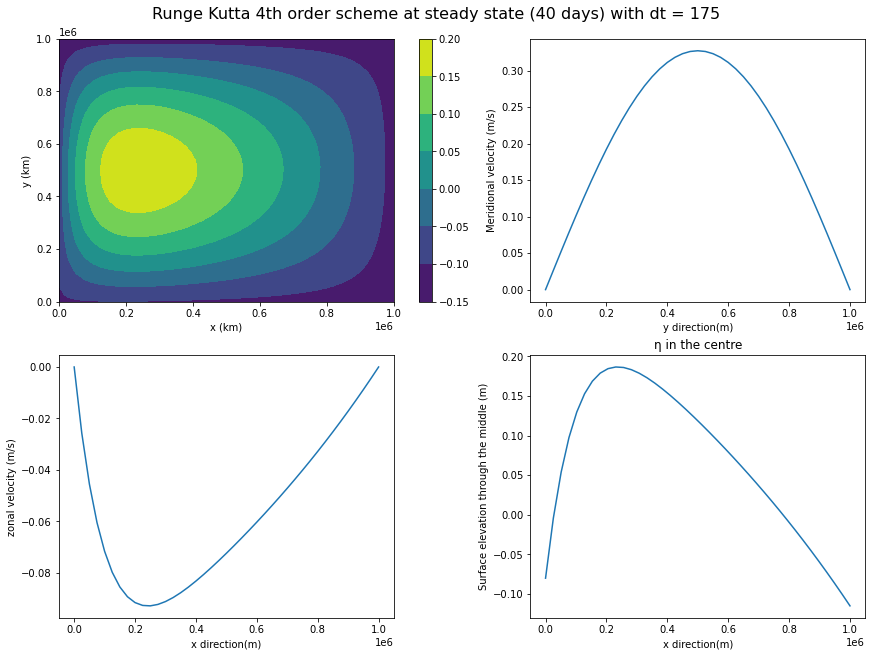

In [17]:
RK4plot(ηvalrk,uvalrk,vvalrk)

As we can see it took 14 seconds whereas the F.B. scheme takes 3.52 seconds so it takes 4 times longer hence F.B. is faster but when it comes to error RK4 has higher order of accuracy.

# References

Beckers, J. and Deleersnijder, E. (1993). Stability of a FBTCS scheme applied to the propagation of shallow-water inertia-gravity waves on various grids. J. Computational Phys., 108, 95–104.

Matsuno, T. (1966). Numerical simulation of the primitive equations by a simulated backward difference method. J. Meteorol. Soc. Japan, 44, 76–84.

Mushgrave, D. (1985). A numerical study of the roles of subgyre-scale mixing and the western boundary current on homogenisation of a passive tracer. J. Geophys. Res., 90, 7037–7043

Stommel, Henry. "The westward intensification of wind‐driven ocean currents." Eos, Transactions American Geophysical Union 29, no. 2 (1948): 202-206.